In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [30]:
#%% Prepare the data
X = np.array([i for i in range(16)]).reshape(-1, 1)
noise_std_dev = 0.5 # Standard deviation of the noise
# Generate random noise
np.random.seed(40)
noise = np.random.normal(loc=0, scale=noise_std_dev, size=X.shape)
y = X + noise # Create y array by adding noise to X
# Add a column of ones to X to account for the bias term (theta_0)
X_b = np.c_[np.ones((len(X), 1)), X]

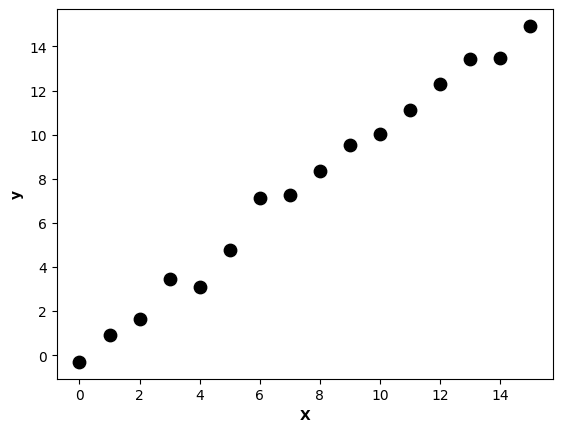

In [31]:
plt.scatter(X,y, color='black',s=80)
plt.xlabel('X', fontweight='bold')
plt.ylabel('y', fontweight='bold')
plt.show()

In [32]:
#%% Define the cost function
def compute_cost(theta, X, y):
    m = len(y)
    predictions = X.dot(theta)
    cost = (1 / (2 * m)) * np.sum((predictions - y) ** 2)
    return cost
# Define the gradient of the cost function
def compute_gradient(theta, X, y):
    m = len(y)
    predictions = X.dot(theta)
    gradients = (1 / m) * X.T.dot(predictions - y)
    return gradients
# Gradient descent algorithm
def gradient_descent(X, y, theta, learning_rate, num_iterations):
    cost_history = []
    theta_history = []
    for i in range(num_iterations):
        gradients = compute_gradient(theta, X, y)
        theta = theta - learning_rate * gradients
        cost = compute_cost(theta, X, y)
        cost_history.append(cost)
        theta_history.append(theta.copy())
    return theta, cost_history, theta_history

In [33]:
theta_initial=np.random.randn(2,1)
learning_rate=0.01
num_iterations=500

In [34]:
theta, cost_history, theta_history= gradient_descent(X_b, y, theta_initial, learning_rate, num_iterations)

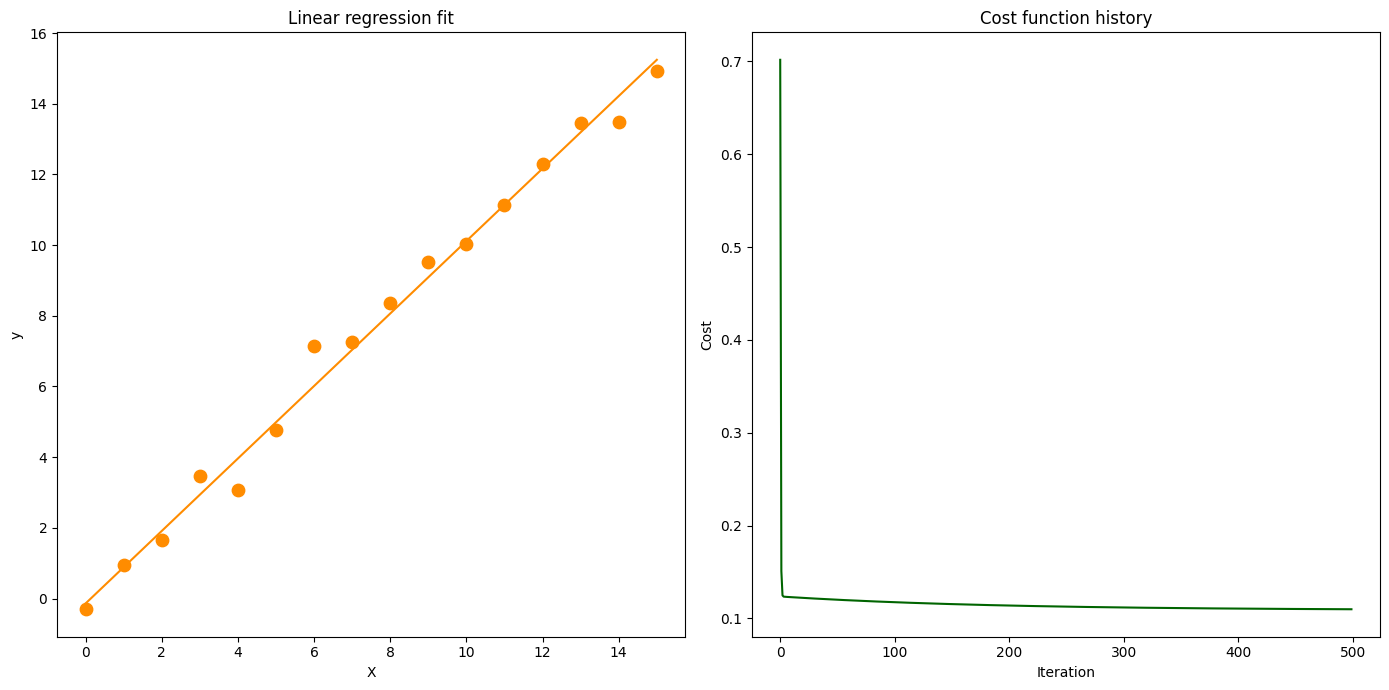

In [39]:
plt.figure(figsize=(14,7))
plt.subplot(1,2,1)
plt.scatter(X,y, color='darkorange', s=80)
te=X_b.dot(theta)
plt.plot(X, te, color='darkorange')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear regression fit')

plt.subplot(1,2,2)
plt.plot(range(num_iterations), cost_history, color='darkgreen')
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.title('Cost function history')

plt.tight_layout()
plt.show()

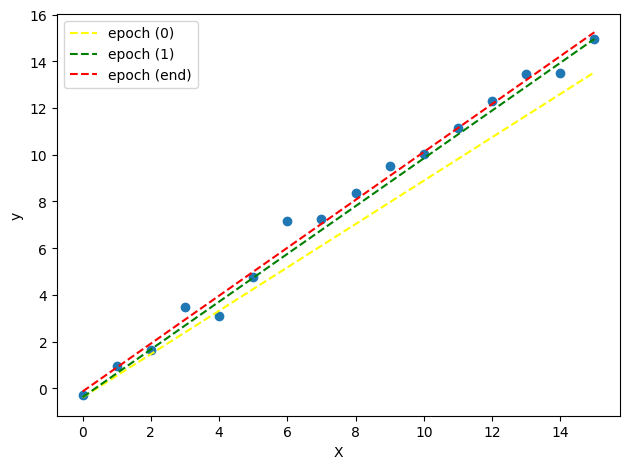

In [42]:
plt.scatter(X,y)
plt.plot(X,X_b.dot(theta_history[0]), linestyle='--', label='epoch (0)', color='yellow')
plt.plot(X,X_b.dot(theta_history[1]), linestyle='--', label='epoch (1)',color='green')
plt.plot(X,X_b.dot(theta_history[499]), linestyle='--', label='epoch (end)', color='red')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()

plt.tight_layout()
plt.show()

CODE LAI De tim dieể dung de break